In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import seaborn as sns

In [5]:

data = pd.read_csv('milknew.csv')


In [6]:
data.shape

(1059, 8)

In [7]:
data.head(5)

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [8]:
data.describe()


,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [10]:
data.isna().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

In [11]:
data.groupby('Grade').size()

Grade
high      256
low       429
medium    374
dtype: int64

In [12]:
data['Grade']=data['Grade'].map({'low':0,'medium':1,'high':2})
data.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,2
1,6.6,36,0,1,0,1,253,2
2,8.5,70,1,1,1,1,246,0
3,9.5,34,1,1,0,1,255,0
4,6.6,37,0,0,0,0,255,1


<AxesSubplot:xlabel='Temprature', ylabel='count'>

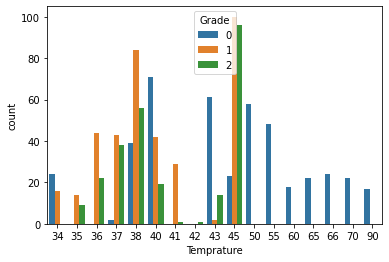

In [13]:
sns.countplot(x=data['Temprature'],hue=data['Grade'], palette = "tab10")


<AxesSubplot:xlabel='pH', ylabel='count'>

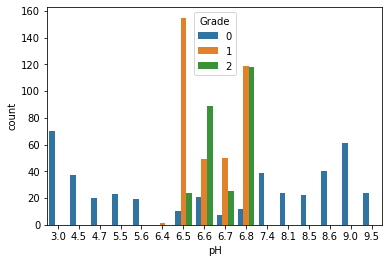

In [14]:
sns.countplot(x=data['pH'],hue=data['Grade'], palette = "tab10")

<AxesSubplot:xlabel='Fat ', ylabel='count'>

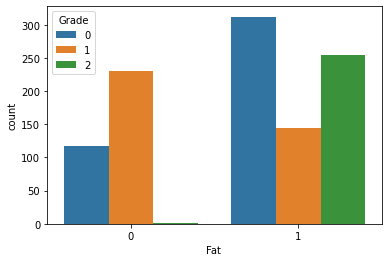

In [15]:
sns.countplot(x=data['Fat '],hue=data['Grade'], palette = "tab10")

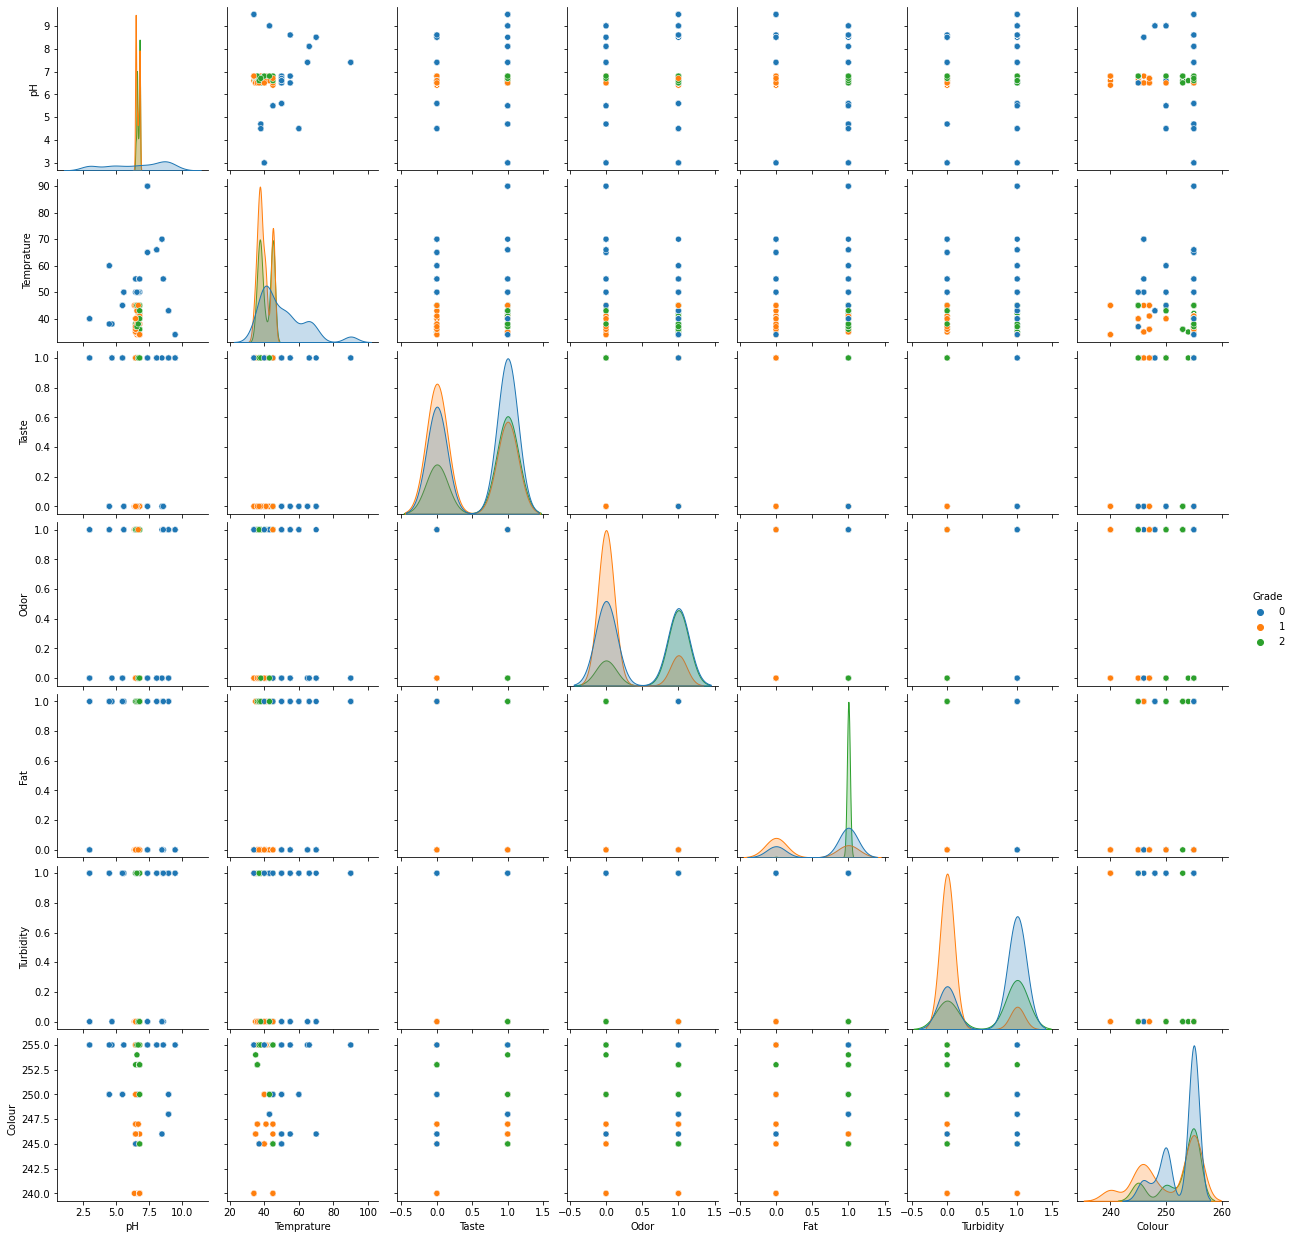

In [16]:
sns.pairplot(data=data, hue='Grade', palette = "tab10")

<AxesSubplot:>

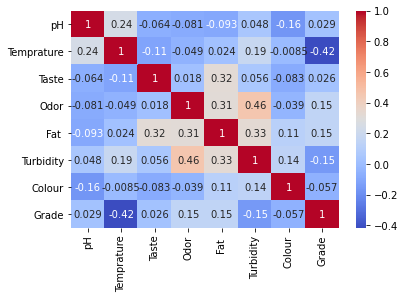

In [17]:
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

In [23]:
# Splitting Data
X=data.drop(['Grade'],axis=1)
y=data['Grade']

In [24]:
X.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
0,6.6,35,1,0,1,0,254
1,6.6,36,0,1,0,1,253
2,8.5,70,1,1,1,1,246
3,9.5,34,1,1,0,1,255
4,6.6,37,0,0,0,0,255


In [25]:
y.head()

0    2
1    2
2    0
3    0
4    1
Name: Grade, dtype: int64

In [27]:
from sklearn.preprocessing import StandardScaler
# Standardization using StandardScaler
sc=StandardScaler()
sc.fit(X)
xscaled=sc.transform(X)
X_scaled=pd.DataFrame(data=xscaled,columns=data.columns[:-1])

In [28]:
# Split Test and Train data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [29]:
X_train.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
331,6.8,40,1,0,1,0,245
44,6.6,45,0,0,0,1,250
307,6.8,45,1,1,1,0,245
323,9.0,43,1,0,1,1,250
1009,9.0,43,1,0,1,1,250


In [33]:
##DECISSION TREE
from sklearn import metrics
fn = ['pH','Temperature','Taste','Odor','Fat','Turbidity','Colour']
cn = ['0', '1', '2']
dt=DecisionTreeClassifier(splitter='best')
dt.fit(X_train,y_train)
dt_preds=dt.predict(X_test)
print("The accuracy of the Decision Tree is","{:f}".format(metrics.accuracy_score(dt_preds,y_test)))

The accuracy of the Decision Tree is 0.990566


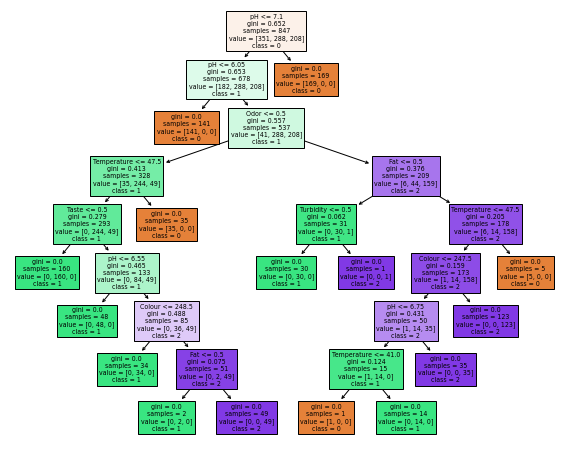

In [35]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
plt.figure(figsize = (10,8))
plot_tree(dt, feature_names = fn, class_names = cn, filled = True);

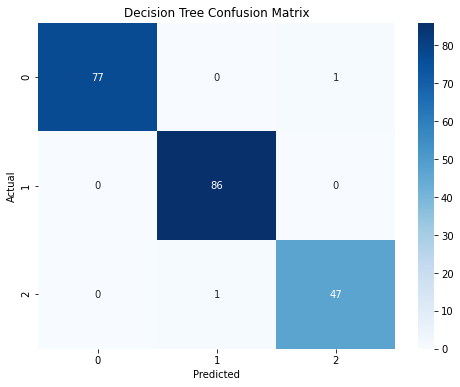

In [37]:
# Calculate the confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix
cm = confusion_matrix(y_test, dt.predict(X_test))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=cn, yticklabels=cn)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')
plt.show()

In [47]:
cm

array([[77,  0,  1],
       [ 0, 86,  0],
       [ 0,  1, 47]], dtype=int64)

In [39]:
##RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

In [41]:
##KNN
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
knn_preds=knn.predict(X_test)

In [45]:
rf_score=accuracy_score(y_test,rf_preds)*100
knn_score=accuracy_score(y_test,knn_preds)*100
dt_score=accuracy_score(y_test,dt_preds)*100

In [46]:
from sklearn.ensemble import RandomForestClassifier
results=pd.DataFrame({
    'Model':['Random Forest','K Nearest Neighbors','Decision Tree'],
    'Accuracy Score':[rf_score,knn_score,dt_score]
})
results_df=results.sort_values(by='Accuracy Score',ascending=False)
results_df=results_df.set_index('Accuracy Score')
results_df.head()

,Model
Accuracy Score,
99.528302,Random Forest
99.056604,Decision Tree
98.584906,K Nearest Neighbors
